In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

Matplotlib is building the font cache; this may take a moment.


In [3]:
import pandas as pd
cdf = pd.read_pickle('data.pkl')
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   dailyConf                            86564 non-null  float64       
 7   dailyDeath                           86564 non-null  float64       
 8   dailyRec                             86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

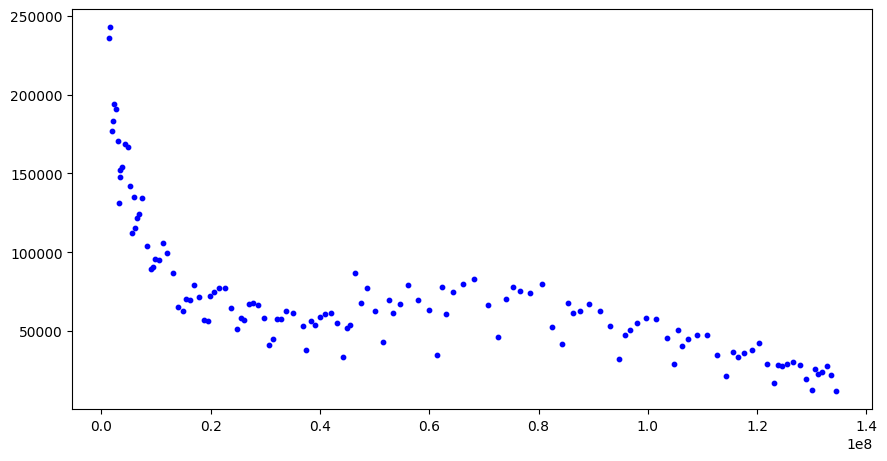

In [4]:
usd = cdf[cdf['country'] == 'United States']
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=usd['people_fully_vaccinated'],
    y=usd['dailyConf'], 
    s=10, 
    marker='o', 
    c= 'blue'
);

In [5]:
combsnotnan = cdf.dropna(subset=['vaccines'])
combslast = combsnotnan.groupby(['country'])['vaccines'].last()
combslast = combslast.apply(lambda x: x.replace(' ', '').split(','))
vaccines_dict = {}
for vaccines_list in combslast:
    for vaccine in vaccines_list:
        if vaccine not in vaccines_dict:
            vaccines_dict[vaccine] = 1
        else:
            vaccines_dict[vaccine] += 1
            
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

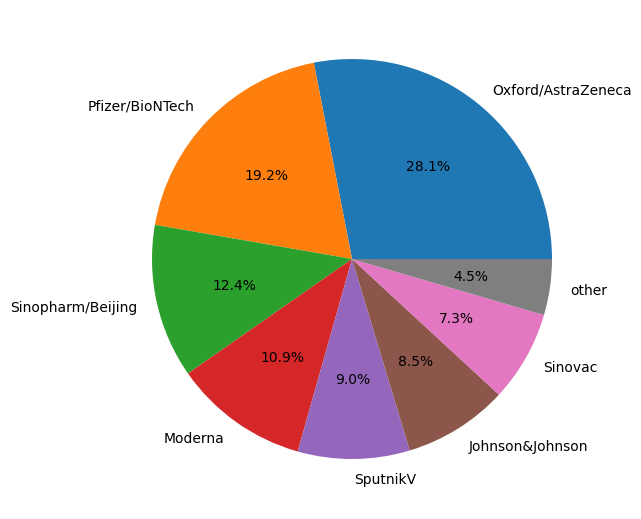

In [6]:
vaccomb = cdf['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccines, 
    labels = vaccines.index, 
    autopct = '%.1f%%', 
);

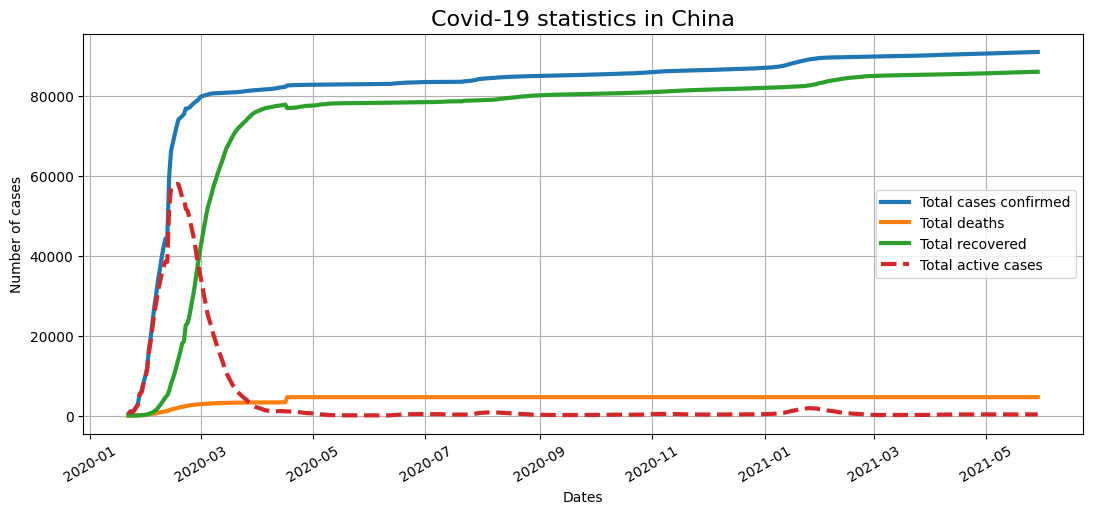

In [7]:
cdat = cdf[cdf['country'] == 'China']
china_grouped = cdat.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label = 'Total cases confirmed', lw=3)
axes.plot(china_grouped['deaths'], label = 'Total deaths', lw=3)
axes.plot(china_grouped['recovered'], label = 'Total recovered', lw=3)
axes.plot(china_grouped['active'], label = 'Total active cases', lw=3, linestyle='dashed')

axes.set_title('Covid-19 statistics in China', fontsize=16)
axes.set_xlabel('Dates')
axes.set_ylabel('Number of cases')
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

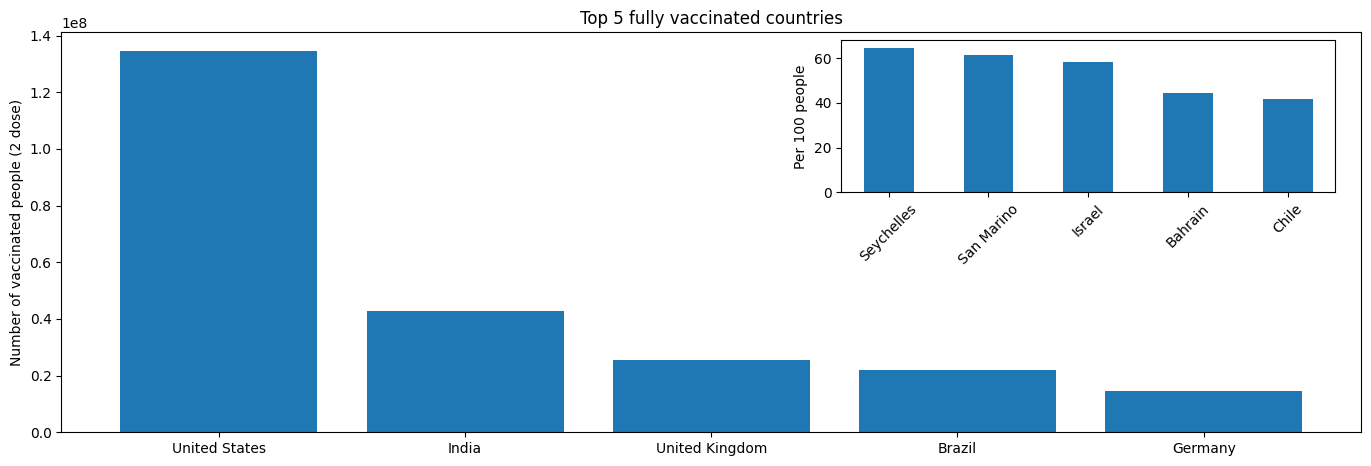

In [8]:
vac_country = cdf.groupby(['country'])['people_fully_vaccinated'].last().nlargest(5)
vac_countryPH = cdf.groupby(['country'])['people_fully_vaccinated_per_hundred'].last().nlargest(5)
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vac_country.index, height = vac_country)
main_axes.set_ylabel('Number of vaccinated people (2 dose)')
main_axes.set_title('Top 5 fully vaccinated countries')

insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vac_countryPH.index, height = vac_countryPH, width=0.5)
insert_axes.set_ylabel('Per 100 people')
insert_axes.xaxis.set_tick_params(rotation=45)

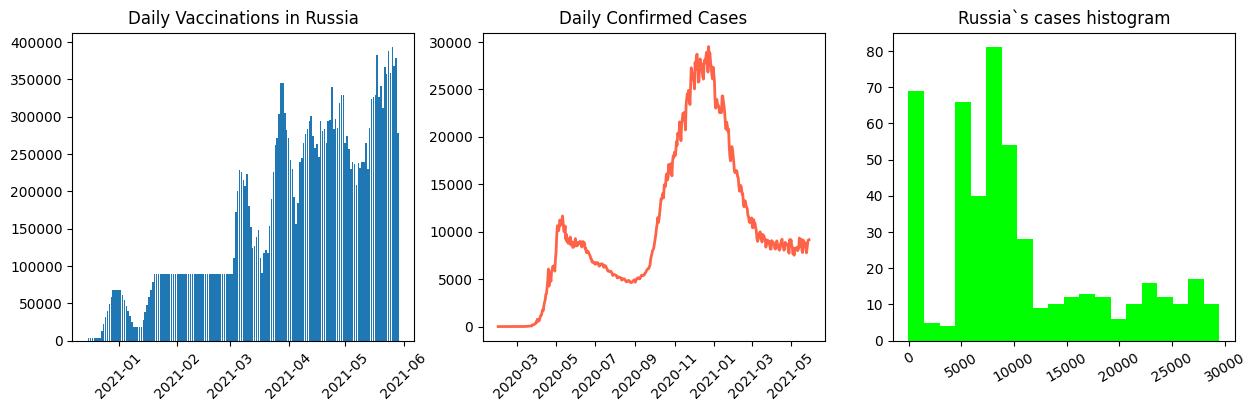

In [9]:
rus_dat = cdf[cdf['country'] == 'Russia']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].bar(x=rus_dat['date'], height=rus_dat['daily_vaccinations'], label = 'Number of vaccinated')
axes[0].set_title('Daily Vaccinations in Russia')
axes[0].xaxis.set_tick_params(rotation=45)

axes[1].plot(rus_dat['date'], rus_dat['dailyConf'], label = 'Daily Confirmed Cases', color = 'tomato', lw=2)
axes[1].set_title('Daily Confirmed Cases')
axes[1].xaxis.set_tick_params(rotation=45)

axes[2].hist(x= rus_dat['dailyConf'], label=['Number of cases'], color='lime', bins=20)
axes[2].set_title('Russia`s cases histogram')
axes[2].xaxis.set_tick_params(rotation=30)

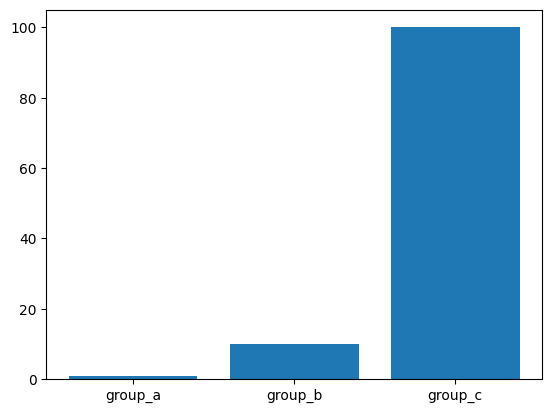

In [10]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()